## Truc a faire:

- Model de la derniere seance de fouille de données a tester
- Model de clustering a tester
- a voir pour tester des auto encodeur



In [20]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import f1_score
pd.set_option('display.max_columns', None)

In [2]:
# from google.colab import drive

# # Montez Google Drive
# drive.mount('/content/drive')

In [3]:
os.listdir('data')

['guillaume.txt']

In [4]:
PATH = 'data/guillaume.txt'

In [5]:
df=pd.read_csv(PATH,sep=";",decimal=",")

/var/folders/1p/fh_mwjqj47d8zs3rgk2kvbnm0000gn/T/ipykernel_39643/789356330.py:1: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(PATH,sep=";",decimal=",")


In [6]:
df.drop(columns=["CodeDecision","ZIBZIN"],inplace=True)

In [7]:
df

,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
0,78643044,0,20.0,2017-02-01 07:32:14,0,0,0,551,0.0,0.0,0.0,37.186668,52.076034,0,1,4.0,4.0,4.0,20.0,0.0,27134
1,78643045,0,20.0,2017-02-01 07:43:37,0,0,0,551,0.0,0.0,0.0,48.844716,52.076034,1,2,1.797685,4.0,4.0,28.61,8.61,27817
2,78643046,0,57.64,2017-02-01 07:47:38,0,0,0,549,0.0,0.0,0.0,73.11828,52.076034,0,1,4.0,4.0,4.0,57.64,0.0,28058
3,78643047,0,54.29,2017-02-01 07:48:48,1,1,1,267,0.0,0.0,0.0,110.056926,53.554234,0,1,4.0,4.0,4.0,54.29,0.0,28128
4,78643048,0,26.9,2017-02-01 08:13:27,0,0,0,549,0.003769,8.586333,0.001192,45.368313,52.076034,1,1,1.997106,4.0,4.0,59.15,32.25,29607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4646769,84966399,0,23.94,2017-11-30 21:20:15,0,0,0,1,4.788,-22.542614,1.970346,42.072631,43.030421,0,1,5.0,5.0,5.0,23.94,0.0,76815
4646770,84966400,0,92.6,2017-11-30 21:22:49,0,0,0,514,0.060052,-2.236379,0.003084,167.130919,36.813027,1,2,1.035949,4.0,4.0,262.45,169.85,76969
4646771,84966401,0,69.0,2017-11-30 21:24:37,0,0,0,1,3.631579,-1.062954,0.790971,72.607261,52.076034,0,1,5.0,5.0,5.0,69.0,0.0,77077
4646772,84966402,0,57.8,2017-11-30 21:57:32,0,0,0,1,28.9,0.567666,0.581925,31.880978,82.051282,0,1,5.0,5.0,5.0,57.8,0.0,79052


In [8]:
df.drop(1956360,inplace=True)

In [9]:
df['DateTransaction'] = pd.to_datetime(df['DateTransaction'], yearfirst=True)

# Création de trois nouvelles colonnes : Année, Mois, Jour
df['Année'] = df['DateTransaction'].dt.year
df['Mois'] = df['DateTransaction'].dt.month
df['Jour'] = df['DateTransaction'].dt.day

# Création de trois nouvelles colonnes : Heure, Minute, Seconde
df['Heure'] = df['DateTransaction'].dt.hour
df['Minute'] = df['DateTransaction'].dt.minute
df['Seconde'] = df['DateTransaction'].dt.second

In [10]:
df.iloc[1956360]

IDAvisAutorisationCheque               78643047
FlagImpaye                                    0
Montant                      54,289999999999999
DateTransaction             2017-02-01 07:48:48
VerifianceCPT1                                1
VerifianceCPT2                                1
VerifianceCPT3                                1
D2CB                                        267
ScoringFP1                                    0
ScoringFP2                                    0
ScoringFP3                                    0
TauxImpNb_RB                 110,05692599620494
TauxImpNB_CPM                53,554233554497365
EcartNumCheq                                  0
NbrMagasin3J                                  1
DiffDateTr1                                   4
DiffDateTr2                                   4
DiffDateTr3                                   4
CA3TRetMtt                   54,289999999999999
CA3TR                                         0
Heure                                   

In [11]:
y=df.FlagImpaye

In [12]:
y=y.astype(int)

In [13]:
df.drop(columns=["FlagImpaye","DateTransaction"],inplace=True)

In [14]:
df

,IDAvisAutorisationCheque,Montant,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Année,Mois,Jour,Minute,Seconde
0,78643044,20.0,0,0,0,551,0.0,0.0,0.0,37.186668,52.076034,0,1,4.0,4.0,4.0,20.0,0.0,7,2017,2,1,32,14
1,78643045,20.0,0,0,0,551,0.0,0.0,0.0,48.844716,52.076034,1,2,1.797685,4.0,4.0,28.61,8.61,7,2017,2,1,43,37
2,78643046,57.64,0,0,0,549,0.0,0.0,0.0,73.11828,52.076034,0,1,4.0,4.0,4.0,57.64,0.0,7,2017,2,1,47,38
3,78643047,54.29,1,1,1,267,0.0,0.0,0.0,110.056926,53.554234,0,1,4.0,4.0,4.0,54.29,0.0,7,2017,2,1,48,48
4,78643048,26.9,0,0,0,549,0.003769,8.586333,0.001192,45.368313,52.076034,1,1,1.997106,4.0,4.0,59.15,32.25,8,2017,2,1,13,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4646769,84966399,23.94,0,0,0,1,4.788,-22.542614,1.970346,42.072631,43.030421,0,1,5.0,5.0,5.0,23.94,0.0,21,2017,11,30,20,15
4646770,84966400,92.6,0,0,0,514,0.060052,-2.236379,0.003084,167.130919,36.813027,1,2,1.035949,4.0,4.0,262.45,169.85,21,2017,11,30,22,49
4646771,84966401,69.0,0,0,0,1,3.631579,-1.062954,0.790971,72.607261,52.076034,0,1,5.0,5.0,5.0,69.0,0.0,21,2017,11,30,24,37
4646772,84966402,57.8,0,0,0,1,28.9,0.567666,0.581925,31.880978,82.051282,0,1,5.0,5.0,5.0,57.8,0.0,21,2017,11,30,57,32


In [15]:
df["ScoringFP1"]=df["ScoringFP1"].replace(',', '.', regex=True)
df["ScoringFP2"]=df["ScoringFP2"].replace(',', '.', regex=True)
df["ScoringFP3"]=df["ScoringFP3"].replace(',', '.', regex=True)
df["Montant"]=df["Montant"].replace(',', '.', regex=True)
df["TauxImpNb_RB"]=df["TauxImpNb_RB"].replace(',', '.', regex=True)
df["TauxImpNB_CPM"]=df["TauxImpNB_CPM"].replace(',', '.', regex=True)
df["DiffDateTr1"]=df["DiffDateTr1"].replace(',', '.', regex=True)
df["DiffDateTr2"]=df["DiffDateTr2"].replace(',', '.', regex=True)
df["DiffDateTr3"]=df["DiffDateTr3"].replace(',', '.', regex=True)
df["CA3TRetMtt"]=df["CA3TRetMtt"].replace(',', '.', regex=True)
df["CA3TR"]=df["CA3TR"].replace(',', '.', regex=True)

## Preprocecing

In [16]:
df.dtypes

IDAvisAutorisationCheque    object
Montant                     object
VerifianceCPT1              object
VerifianceCPT2              object
VerifianceCPT3              object
D2CB                        object
ScoringFP1                  object
ScoringFP2                  object
ScoringFP3                  object
TauxImpNb_RB                object
TauxImpNB_CPM               object
EcartNumCheq                object
NbrMagasin3J                object
DiffDateTr1                 object
DiffDateTr2                 object
DiffDateTr3                 object
CA3TRetMtt                  object
CA3TR                       object
Heure                        int32
Année                        int32
Mois                         int32
Jour                         int32
Minute                       int32
Seconde                      int32
dtype: object

In [17]:
print(y.value_counts())
neg, pos = y.value_counts()
pourcentage = pos / neg *100
pourcentage

FlagImpaye
0    4616778
1      29995
Name: count, dtype: int64


0.6496955235880955

(array([4616778.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,   29995.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

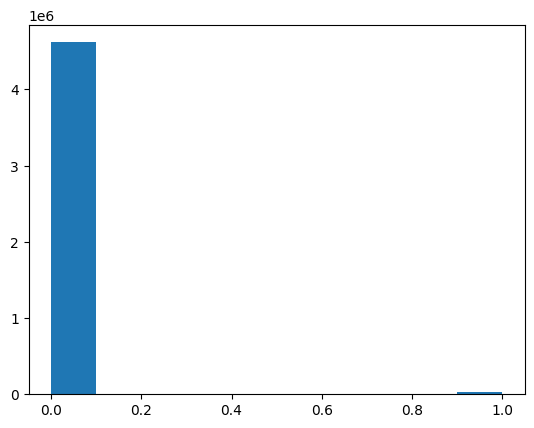

In [18]:
import matplotlib.pyplot as plt
plt.hist(y)

### Sampling

In [19]:
#from imblearn.under_sampling import CondensedNearestNeighbour
#cnn = CondensedNearestNeighbour(sampling_strategy="majority")
#X_res, y_res = cnn.fit_resample(df, y)
#X_res

In [19]:
df

,IDAvisAutorisationCheque,Montant,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Année,Mois,Jour,Minute,Seconde
0,78643044,20.0,0,0,0,551,0.0,0.0,0.0,37.186668,52.076034,0,1,4.0,4.0,4.0,20.0,0.0,7,2017,2,1,32,14
1,78643045,20.0,0,0,0,551,0.0,0.0,0.0,48.844716,52.076034,1,2,1.797685,4.0,4.0,28.61,8.61,7,2017,2,1,43,37
2,78643046,57.64,0,0,0,549,0.0,0.0,0.0,73.11828,52.076034,0,1,4.0,4.0,4.0,57.64,0.0,7,2017,2,1,47,38
3,78643047,54.29,1,1,1,267,0.0,0.0,0.0,110.056926,53.554234,0,1,4.0,4.0,4.0,54.29,0.0,7,2017,2,1,48,48
4,78643048,26.9,0,0,0,549,0.003769,8.586333,0.001192,45.368313,52.076034,1,1,1.997106,4.0,4.0,59.15,32.25,8,2017,2,1,13,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4646769,84966399,23.94,0,0,0,1,4.788,-22.542614,1.970346,42.072631,43.030421,0,1,5.0,5.0,5.0,23.94,0.0,21,2017,11,30,20,15
4646770,84966400,92.6,0,0,0,514,0.060052,-2.236379,0.003084,167.130919,36.813027,1,2,1.035949,4.0,4.0,262.45,169.85,21,2017,11,30,22,49
4646771,84966401,69.0,0,0,0,1,3.631579,-1.062954,0.790971,72.607261,52.076034,0,1,5.0,5.0,5.0,69.0,0.0,21,2017,11,30,24,37
4646772,84966402,57.8,0,0,0,1,28.9,0.567666,0.581925,31.880978,82.051282,0,1,5.0,5.0,5.0,57.8,0.0,21,2017,11,30,57,32


In [20]:
result = df[(df['Mois'] == 9) & (df['Jour'] == 1)]

In [21]:
result

,IDAvisAutorisationCheque,Montant,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Année,Mois,Jour,Minute,Seconde
3899363,83140472,60.0,0,0,0,302,0.0,0.0,0.0,45.368313,52.076034,0,1,4.0,4.0,4.0,60.0,0.0,7,2017,9,1,34,17
3899364,83140475,25.0,0,0,0,547,0.0,0.0,0.0,73.11828,52.076034,0,1,4.0,4.0,4.0,25.0,0.0,8,2017,9,1,6,17
3899365,83140477,32.0,0,0,0,152,0.0,0.0,0.0,45.368313,52.076034,0,1,4.0,4.0,4.0,32.0,0.0,8,2017,9,1,8,3
3899366,83140480,20.88,0,0,0,393,0.00759,0.182221,0.002092,45.14268,34.118277,4,1,0.573461,0.998206,1.539155,92.39,71.51,8,2017,9,1,9,3
3899367,83140481,20.21,0,0,0,152,0.018994,-1.024399,0.005682,45.368313,52.076034,0,1,4.0,4.0,4.0,20.21,0.0,8,2017,9,1,11,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3910725,83168536,62.7,0,0,0,1,62.7,0.105322,0.582942,39.99059,17.579748,0,1,5.0,5.0,5.0,62.7,0.0,21,2017,9,1,53,57
3910726,83168537,278.35,0,0,0,1,8.434848,-0.929372,0.799228,45.368313,52.076034,0,1,5.0,5.0,5.0,278.35,0.0,21,2017,9,1,58,31
3910727,83168538,66.96,0,0,0,1,5.150769,-4.358045,0.777725,35.143209,50.882565,0,1,5.0,5.0,5.0,66.96,0.0,22,2017,9,1,2,36
3910728,83168539,30.35,0,0,0,1,10.116667,0.497221,0.490808,44.642857,37.586887,0,1,5.0,5.0,5.0,30.35,0.0,22,2017,9,1,4,11


In [21]:
# from imblearn.combine import SMOTEENN
# sme = SMOTEENN(random_state=1, sampling_strategy= 0.01)
# X_res, y_res = sme.fit_resample(df, y)
# X_res

,IDAvisAutorisationCheque,Montant,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Année,Mois,Jour,Minute,Seconde
0,78643044.0,20.0,0.0,0.0,0.0,551.0,0.0,0.0,0.0,37.186668,52.076034,0.0,1.0,4.0,4.0,4.0,20.0,0.0,7,2017,2,1,32,14
1,78643045.0,20.0,0.0,0.0,0.0,551.0,0.0,0.0,0.0,48.844716,52.076034,1.0,2.0,1.797685,4.0,4.0,28.61,8.61,7,2017,2,1,43,37
2,78643046.0,57.64,0.0,0.0,0.0,549.0,0.0,0.0,0.0,73.11828,52.076034,0.0,1.0,4.0,4.0,4.0,57.64,0.0,7,2017,2,1,47,38
3,78643047.0,54.29,1.0,1.0,1.0,267.0,0.0,0.0,0.0,110.056926,53.554234,0.0,1.0,4.0,4.0,4.0,54.29,0.0,7,2017,2,1,48,48
4,78643048.0,26.9,0.0,0.0,0.0,549.0,0.003769,8.586333,0.001192,45.368313,52.076034,1.0,1.0,1.997106,4.0,4.0,59.15,32.25,8,2017,2,1,13,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4546760,79728804.0,113.48,1.0,1.0,1.0,1.0,22.696,1.220456,0.836269,55.644188,50.882565,0.0,1.0,5.0,5.0,5.0,113.48,0.0,10,2017,3,25,55,12
4546761,82152395.100616,78.050636,3.830538,3.830538,3.830538,119.105028,0.050692,3.82706,0.006506,30.753351,27.551219,2.830538,1.0,0.227347,0.229552,0.272021,286.321654,208.271018,10,2017,7,15,43,12
4546762,79081353.007001,13.323837,0.0,0.0,0.0,139.658333,0.014412,-7.425177,0.006755,41.159019,29.085141,0.0,1.0,4.0,4.0,4.0,13.323837,0.0,15,2017,2,22,7,33
4546763,79317225.135953,63.44,0.0,0.0,0.0,67.0,0.0,0.0,0.0,25.631441,28.028904,2.942696,1.0,2.692305,4.0,4.0,84.182738,20.742738,14,2017,3,4,58,15


In [22]:
# from imblearn.under_sampling import TomekLinks
# tl = TomekLinks(sampling_strategy="majority")
# X_res, y_res = tl.fit_resample(df, y)
# X_res

In [23]:
# from imblearn.over_sampling import BorderlineSMOTE
# bsm= BorderlineSMOTE(random_state=42, sampling_strategy= 0.01)
# X_res, y_res = bsm.fit_resample(X_res, y_res)
# X_res

In [24]:
neg, pos = y_res.value_counts()
pourcentage = pos / neg *100
pourcentage

0.11150007453154666

In [21]:
X=pd.read_csv("X.csv")
y=pd.read_csv("y.csv")

In [22]:
X.drop(columns=["Unnamed: 0"],inplace=True)

In [23]:
X["FlagImpaye"]=y["FlagImpaye"]

In [24]:
X.sort_values(by=['Mois','Jour'], ascending=True,inplace=True)

In [32]:
pd.set_option('display.max_rows', 15)

In [27]:
# X.to_csv("tmp.csv",sep=";",index=False)

In [30]:
result = X[(X['Mois'] == 9) & (X['Jour'] == 1)]

In [33]:
result

,IDAvisAutorisationCheque,Montant,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Année,Mois,Jour,Minute,Seconde,FlagImpaye
3823542,83140472.0,60.00,0.0,0.0,0.0,302.0,0.000000,0.000000,0.000000,45.368313,52.076034,0.0,1.0,4.000000,4.000000,4.000000,60.00,0.00,7,2017,9,1,34,17,0
3823543,83140475.0,25.00,0.0,0.0,0.0,547.0,0.000000,0.000000,0.000000,73.118280,52.076034,0.0,1.0,4.000000,4.000000,4.000000,25.00,0.00,8,2017,9,1,6,17,0
3823544,83140477.0,32.00,0.0,0.0,0.0,152.0,0.000000,0.000000,0.000000,45.368313,52.076034,0.0,1.0,4.000000,4.000000,4.000000,32.00,0.00,8,2017,9,1,8,3,0
3823545,83140480.0,20.88,0.0,0.0,0.0,393.0,0.007590,0.182221,0.002092,45.142680,34.118277,4.0,1.0,0.573461,0.998206,1.539155,92.39,71.51,8,2017,9,1,9,3,0
3823546,83140481.0,20.21,0.0,0.0,0.0,152.0,0.018994,-1.024399,0.005682,45.368313,52.076034,0.0,1.0,4.000000,4.000000,4.000000,20.21,0.00,8,2017,9,1,11,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3834484,83168537.0,278.35,0.0,0.0,0.0,1.0,8.434848,-0.929372,0.799228,45.368313,52.076034,0.0,1.0,5.000000,5.000000,5.000000,278.35,0.00,21,2017,9,1,58,31,0
3834485,83168538.0,66.96,0.0,0.0,0.0,1.0,5.150769,-4.358045,0.777725,35.143209,50.882565,0.0,1.0,5.000000,5.000000,5.000000,66.96,0.00,22,2017,9,1,2,36,0
3834486,83168539.0,30.35,0.0,0.0,0.0,1.0,10.116667,0.497221,0.490808,44.642857,37.586887,0.0,1.0,5.000000,5.000000,5.000000,30.35,0.00,22,2017,9,1,4,11,0
3834487,83168540.0,86.40,0.0,0.0,0.0,1.0,86.400000,0.247324,0.519201,38.992084,44.073599,0.0,1.0,5.000000,5.000000,5.000000,86.40,0.00,22,2017,9,1,37,3,0


## Random Forest

In [34]:
sep=3823542

In [35]:
train=X.loc[X.index < 3823542]
test=X.loc[X.index >= 3823542]

In [37]:
X_train = train.loc[:, train.columns != 'FlagImpaye']
y_train= train.loc[:, train.columns == 'FlagImpaye']

X_test = test.loc[:, test.columns != 'FlagImpaye']
y_test = test.loc[:, test.columns == 'FlagImpaye']

In [40]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [4, 8, 10]
}

In [42]:
# X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, min_samples_leaf=8, min_samples_split=10)

# grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
rf_classifier.fit(X_train, y_train)


predictions = rf_classifier.predict(X_test)

# print(best_params)

accuracy = accuracy_score(y_test, predictions)

print(accuracy)

/Users/adriencastex/Documents/Adrien/Cours/fouille_de_donnees/fouille/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


KeyboardInterrupt: 

In [ ]:
prediction = rf_classifier.predict(X_test)

# print(best_params)

accuracy = accuracy_score(y_test, predictions)

In [ ]:
f1_score(y_test,prediction)

0.3573667711598746

In [ ]:
corr

In [ ]:
X_res.to_csv("X.csv")
y_res.to_csv("y.csv")

## Arbre de decision

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(decision_tree_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_decision_tree_classifier = grid_search.best_estimator_

predictions = best_decision_tree_classifier.predict(X_test)

accuracy_score(predictions,y_test)


0.999589818255397

In [ ]:
f1_score(y_test,predictions)

0.8236406619385344

## Deep learning

In [ ]:
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers import Dropout, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras.initializers import Constant

from tensorflow import keras

import tensorflow as tf

2023-12-29 03:52:38.757669: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/adriencastex/Documents/Adrien/Cours/fouille_de_donnees/fouille/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [ ]:
neg, pos = np.bincount(y)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
X_train.columns

Index(['IDAvisAutorisationCheque', 'Montant', 'VerifianceCPT1',
       'VerifianceCPT2', 'VerifianceCPT3', 'D2CB', 'ScoringFP1', 'ScoringFP2',
       'ScoringFP3', 'TauxImpNb_RB', 'TauxImpNB_CPM', 'EcartNumCheq',
       'NbrMagasin3J', 'DiffDateTr1', 'DiffDateTr2', 'DiffDateTr3',
       'CA3TRetMtt', 'CA3TR', 'Heure', 'Année', 'Mois', 'Jour', 'Minute',
       'Seconde'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Centrer et réduire les colonnes du DataFrame
X_train = pd.DataFrame(scaler.fit_transform(X_train))

In [ ]:
output_bias=np.log([pos/neg])

In [ ]:
output_bias

array([-5.03642164])

In [ ]:
# A modif ça marche pas
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
      keras.metrics.F1Score(name="f1_score") #Erreur ici
]

In [ ]:
output_bias = tf.keras.initializers.Constant(output_bias)

In [ ]:
output_bias

In [ ]:
inputs=Input((X_train.shape[1]))


d1 = Dense(16, activation='relu')(inputs)
d1 = Dropout(0.3)(d1)

outputs=Dense(1, activation='sigmoid', bias_initializer=output_bias)(d1)

model = Model(inputs=[inputs], outputs=[outputs])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense (Dense)               (None, 16)                400       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 417 (1.63 KB)
Trainable params: 417 (1.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
filepath = "model.h5"

earlystopper = EarlyStopping(patience=5, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min')

callbacks_list = [earlystopper, checkpoint]

history = model.fit(X_train, y_train, validation_split=0.1, batch_size=200, epochs=800, callbacks=callbacks_list)

Epoch 1/800
16349/16369 [============================>.] - ETA: 0s - loss: 0.0074 - accuracy: 0.9989
Epoch 1: val_loss improved from inf to 0.00718, saving model to model.h5
16369/16369 [==============================] - 48s 3ms/step - loss: 0.0074 - accuracy: 0.9989 - val_loss: 0.0072 - val_accuracy: 0.9988
Epoch 2/800
   22/16369 [..............................] - ETA: 39s - loss: 0.0071 - accuracy: 0.9991

/Users/adriencastex/Documents/Adrien/Cours/fouille_de_donnees/fouille/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16366/16369 [============================>.] - ETA: 0s - loss: 0.0070 - accuracy: 0.9989
Epoch 2: val_loss improved from 0.00718 to 0.00710, saving model to model.h5
16369/16369 [==============================] - 39s 2ms/step - loss: 0.0070 - accuracy: 0.9989 - val_loss: 0.0071 - val_accuracy: 0.9988
Epoch 3/800
16365/16369 [============================>.] - ETA: 0s - loss: 0.0069 - accuracy: 0.9989
Epoch 3: val_loss did not improve from 0.00710
16369/16369 [==============================] - 39s 2ms/step - loss: 0.0069 - accuracy: 0.9989 - val_loss: 0.0071 - val_accuracy: 0.9988
Epoch 4/800
16352/16369 [============================>.] - ETA: 0s - loss: 0.0069 - accuracy: 0.9989
Epoch 4: val_loss did not improve from 0.00710
16369/16369 [==============================] - 40s 2ms/step - loss: 0.0069 - accuracy: 0.9989 - val_loss: 0.0073 - val_accuracy: 0.9988
Epoch 5/800
16359/16369 [============================>.] - ETA: 0s - loss: 0.0069 - accuracy: 0.9989
Epoch 5: val_loss improved fr

In [ ]:
# use the best epoch
model.load_weights('model.h5')

In [ ]:
X_test.dtypes

IDAvisAutorisationCheque    float64
Montant                     float64
VerifianceCPT1              float64
VerifianceCPT2              float64
VerifianceCPT3              float64
D2CB                        float64
ScoringFP1                  float64
ScoringFP2                  float64
ScoringFP3                  float64
TauxImpNb_RB                float64
TauxImpNB_CPM               float64
EcartNumCheq                float64
NbrMagasin3J                float64
DiffDateTr1                 float64
DiffDateTr2                 float64
DiffDateTr3                 float64
CA3TRetMtt                  float64
CA3TR                       float64
Heure                       float64
Année                       float64
Mois                        float64
Jour                        float64
Minute                      float64
Seconde                     float64
dtype: object

In [ ]:
X_test = X_test.astype(float)

In [ ]:
test_preds = model.predict(X_test)

28418/28418 [==============================] - 66s 2ms/step


In [ ]:
accuracy_score(test_preds,y_test)

0.9988475322564505

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
tst=test_preds[:,0].astype(int)

In [ ]:
tst=tst.tolist()

In [ ]:
y_test.tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
f1_score(y_test.tolist(),tst)

0.0